In [21]:
import pandas as pd
import numpy as np

In [2]:
wine_data= pd.read_csv('wine.csv')

In [3]:
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

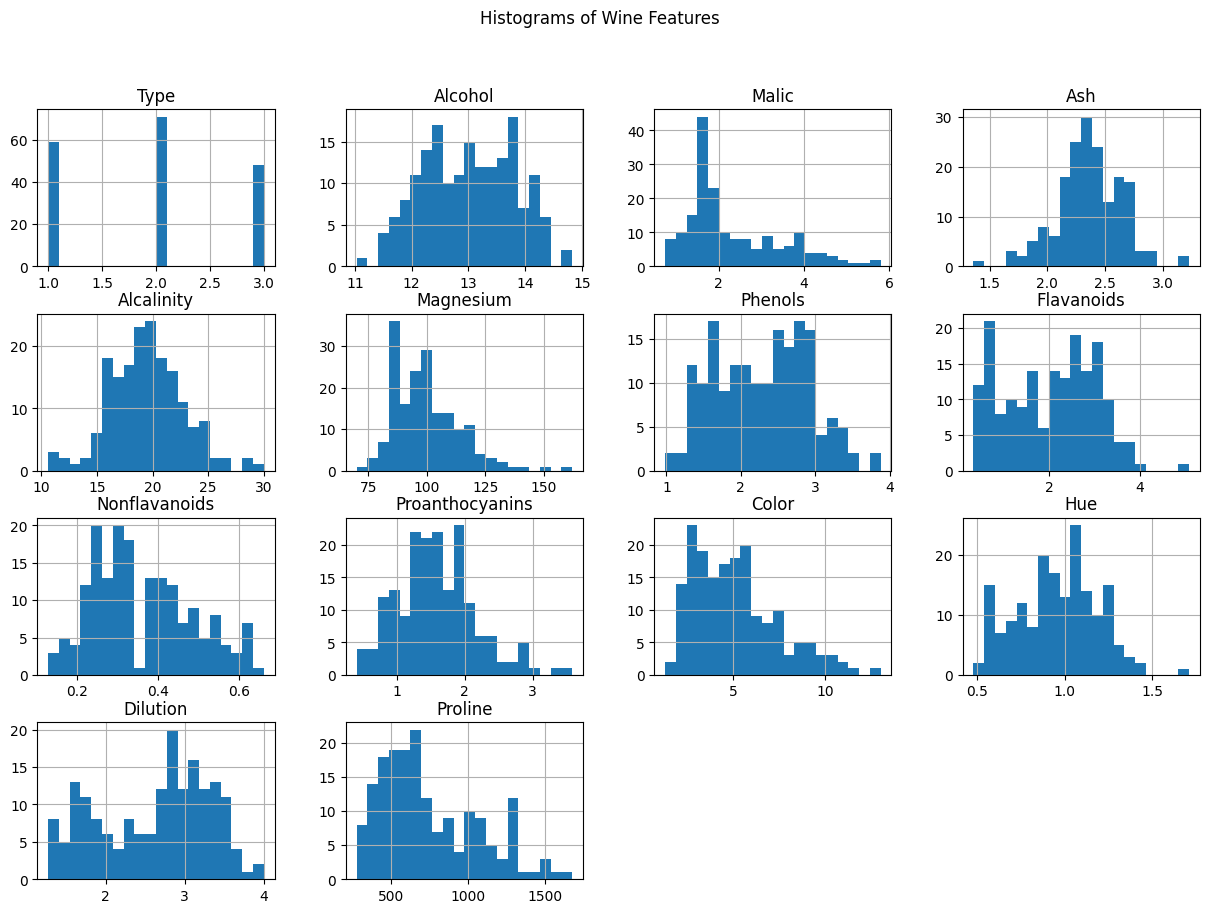

In [9]:
# Histograms 
wine_data.hist(bins=20, figsize=(15, 10)) 
plt.suptitle("Histograms of Wine Features") 
plt.show()

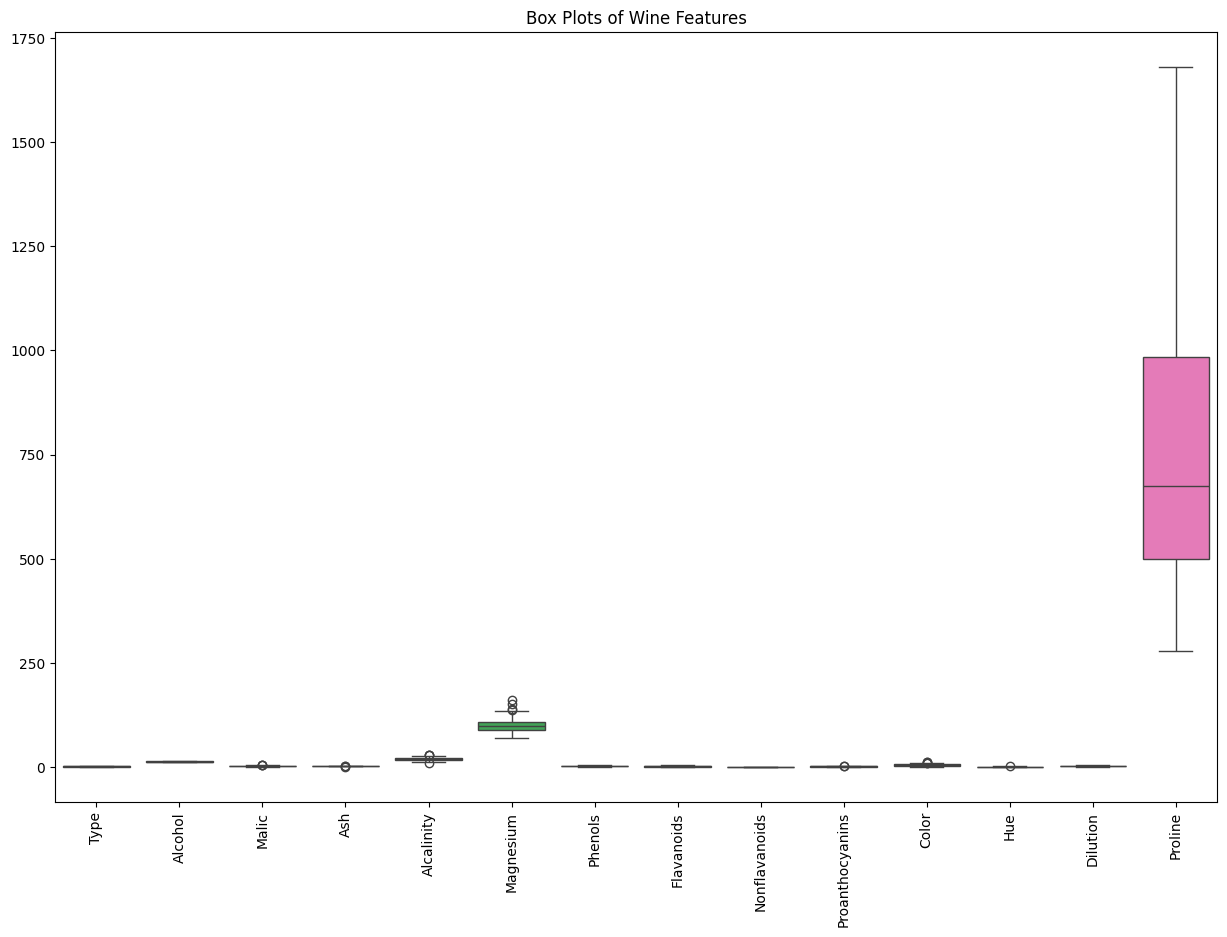

In [10]:
# Box plots 
plt.figure(figsize=(15, 10)) 
sns.boxplot(data=wine_data) 
plt.xticks(rotation=90) 
plt.title("Box Plots of Wine Features") 
plt.show()

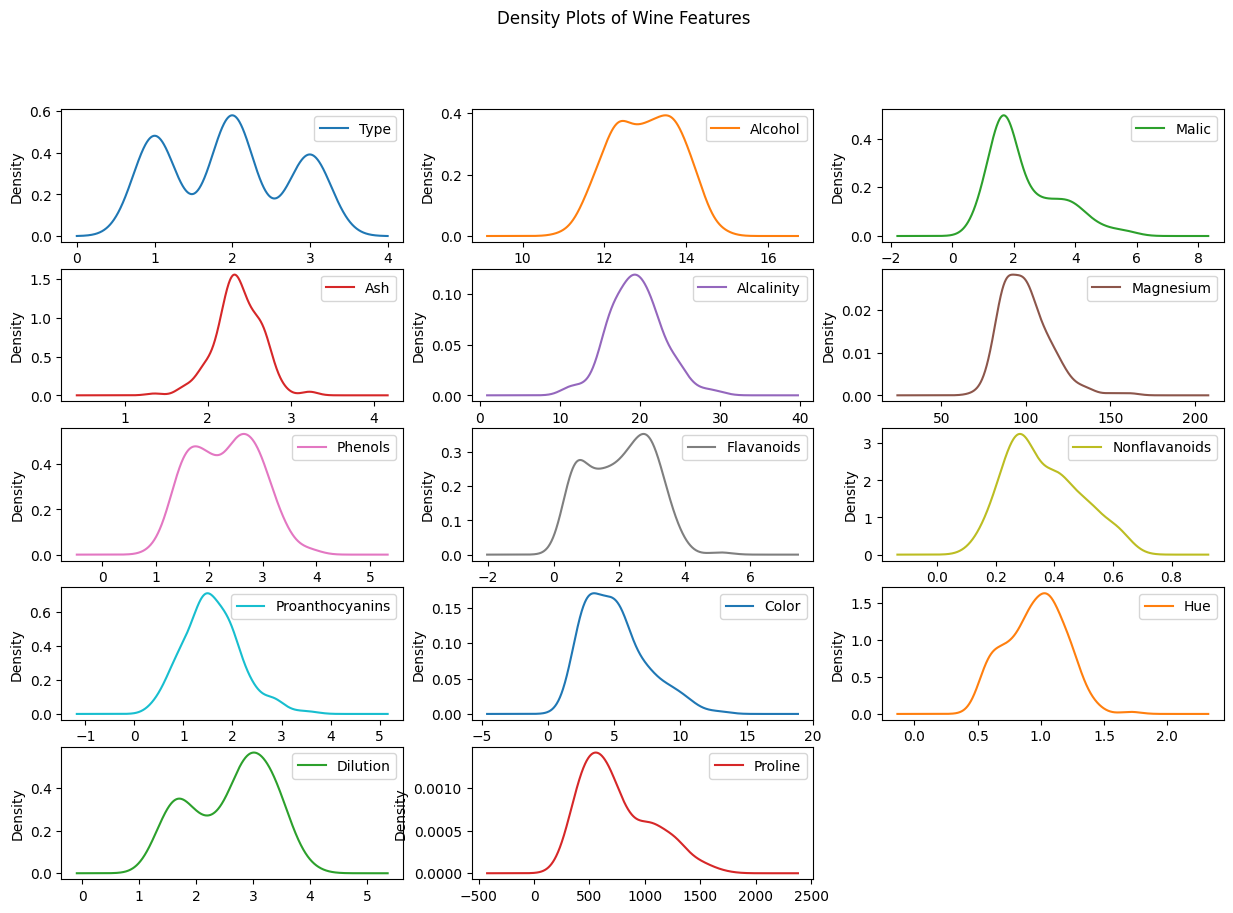

In [11]:

# Density plots
wine_data.plot(kind='density', subplots=True, layout=(5, 3), sharex=False, figsize=(15, 10))
plt.suptitle("Density Plots of Wine Features")
plt.show()


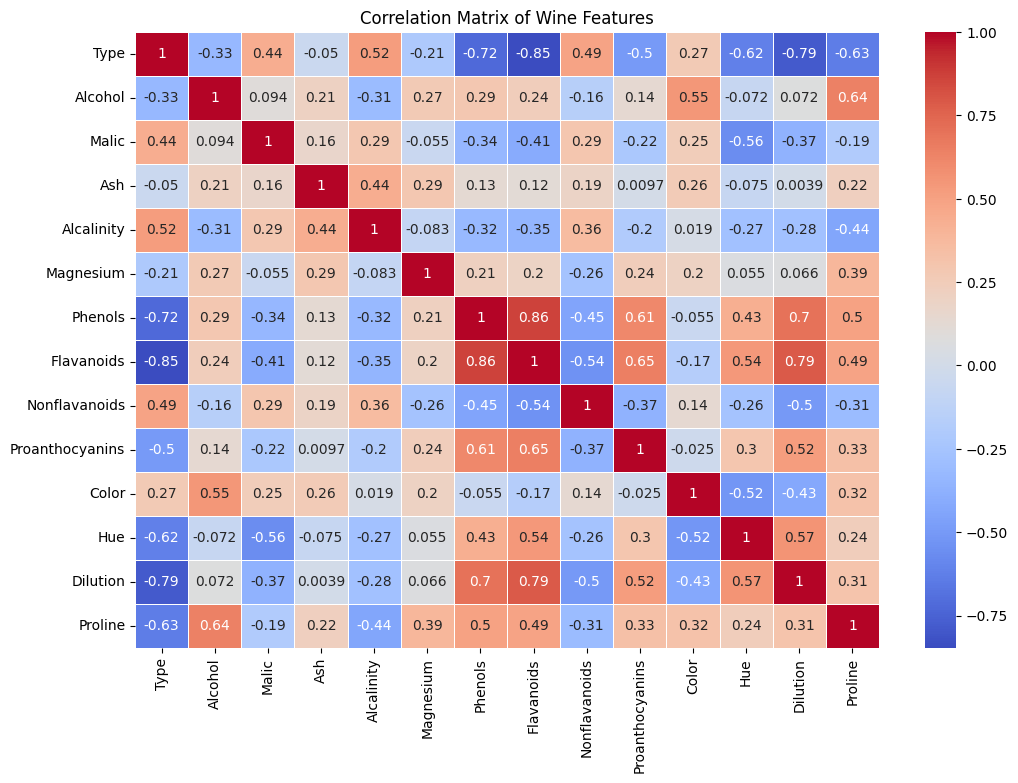

In [12]:
# Correlation matrix
correlation_matrix = wine_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Wine Features")
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [18]:
column_names = ["Type", "Alcohol", "Malic", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", "Nonflavanoids", "Proanthocyanins", "Color", "Hue", "Dilution", "Proline"]
# Standardize the features 
features = column_names[1:] 
X = wine_data[features] 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [19]:
# Apply PCA 
pca = PCA() 
X_pca = pca.fit_transform(X_scaled)

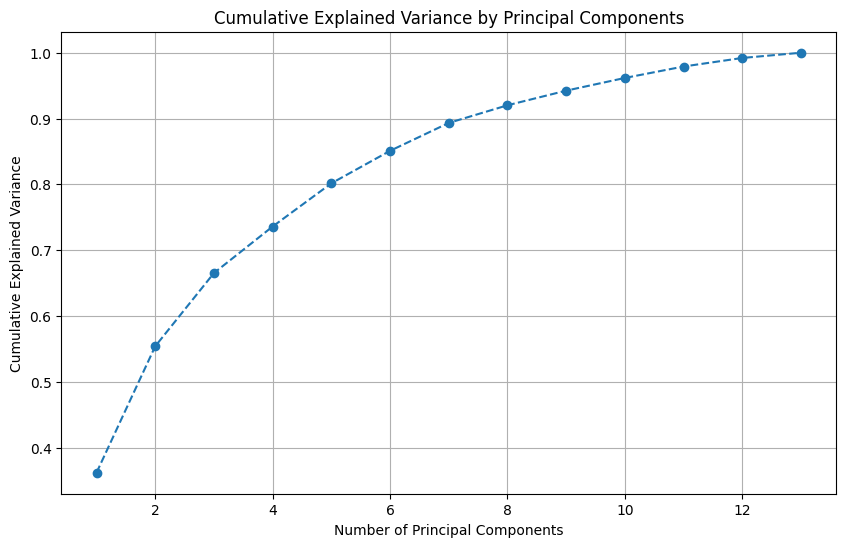

In [20]:
# Scree plot 
plt.figure(figsize=(10, 6)) 
plt.plot(range(1, len(features) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--') 
plt.title("Cumulative Explained Variance by Principal Components") 
plt.xlabel("Number of Principal Components") 
plt.ylabel("Cumulative Explained Variance") 
plt.grid() 
plt.show()

In [22]:
# Determine the optimal number of principal components 
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_) 
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1 
print(f"Optimal number of principal components: {optimal_components}")

Optimal number of principal components: 10


In [23]:
# Transform the original dataset into the principal components 
pca = PCA(n_components=optimal_components) 
X_pca_optimal = pca.fit_transform(X_scaled)

In [24]:
# Create a DataFrame with the principal components 
pca_columns = [f"PC{i+1}" for i in range(optimal_components)] 
pca_df = pd.DataFrame(X_pca_optimal, columns=pca_columns) 
pca_df['Type'] = wine_data['Type']

In [25]:
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  Type  
0 -0.065139 -0.641443  1.020956     1  
1 -1.024416  0.308847  0.159701     1  
2  0.344216  1.177834  0.113361     1  
3 -0.643593 -0.052544  0.239413     1  
4 -0.416700 -0.326819 -0.078366     1  


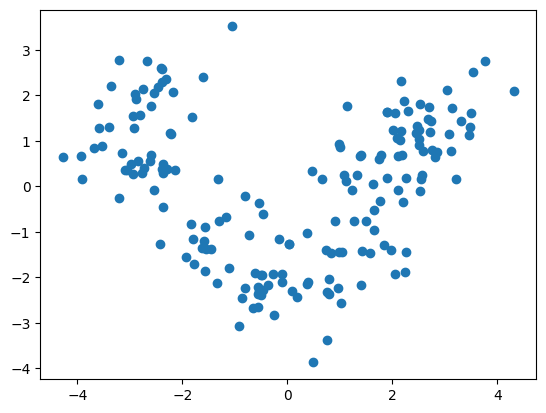

In [26]:
x=pca_df.iloc[:,0]
y=pca_df.iloc[:,1]
plt.scatter(x,y)

In [33]:
finalDF = pd.concat([pca_df[['PC1','PC2']], wine_data[['Type']]], axis=1)

In [35]:
finalDF.head()

,PC1,PC2,Type
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1


Text(0, 0.5, 'Principal Component 2')

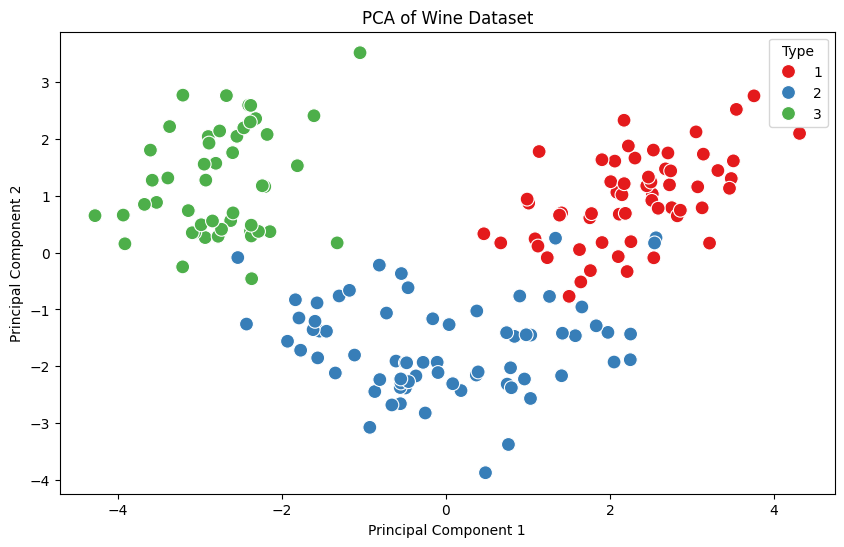

In [34]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=finalDF, x='PC1', y='PC2', hue='Type', palette='Set1', s=100) 
plt.title('PCA of Wine Dataset') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')

In [56]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [57]:
# Apply K-means clustering 
kmeans = KMeans(n_clusters=3, random_state=42) 
# Assuming we want to find 3 clusters 
clusters = kmeans.fit_predict(X_scaled)

In [58]:
# Add cluster labels to the DataFrame 
wine_data['Cluster_KMeans'] = clusters

In [59]:
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_KMeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


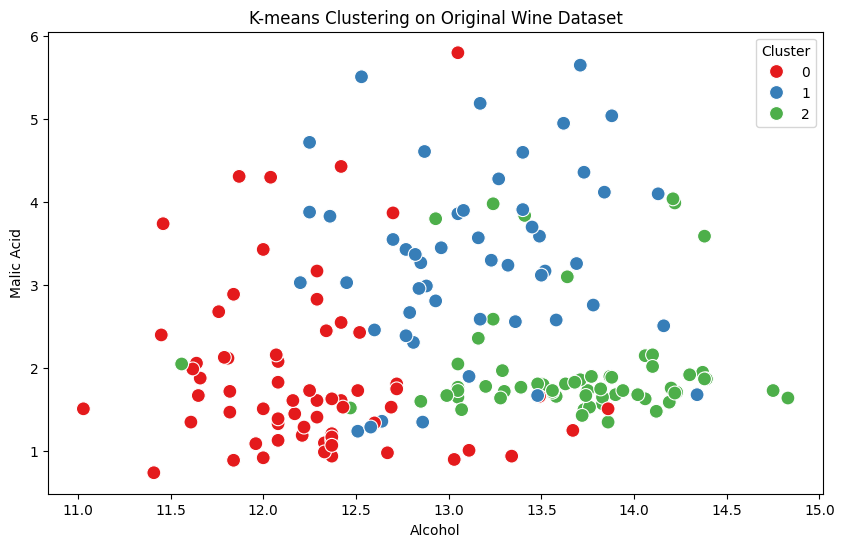

In [60]:
# Visualize the clustering results 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=wine_data, x='Alcohol', y='Malic', hue='Cluster_KMeans', palette='Set1', s=100) 
plt.title('K-means Clustering on Original Wine Dataset')
plt.xlabel('Alcohol') 
plt.ylabel('Malic Acid')
plt.legend(title='Cluster') 
plt.show()

In [61]:
# Evaluate the clustering performance 
silhouette_avg = silhouette_score(X_scaled, clusters) 
davies_bouldin_avg = davies_bouldin_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}') 
print(f'Davies–Bouldin Index: {davies_bouldin_avg}')

Silhouette Score: 0.2848589191898987
Davies–Bouldin Index: 1.3891879777181648


In [64]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Type
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,1
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,1
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,1
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,1
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,1
...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498,-0.304117,3
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969,-0.206061,3
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222,-0.247997,3
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448,0.491490,3


In [65]:
# Apply K-means clustering to the PCA-transformed data 
kmeans_pca = KMeans(n_clusters=3, random_state=42) 
clusters_pca = kmeans_pca.fit_predict(X_pca) 
pca_df['Cluster_KMeans'] = clusters_pca

In [66]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Type,Cluster_KMeans
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,1,2
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,1,2
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,1,2
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,1,2
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498,-0.304117,3,1
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969,-0.206061,3,1
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222,-0.247997,3,1
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448,0.491490,3,1


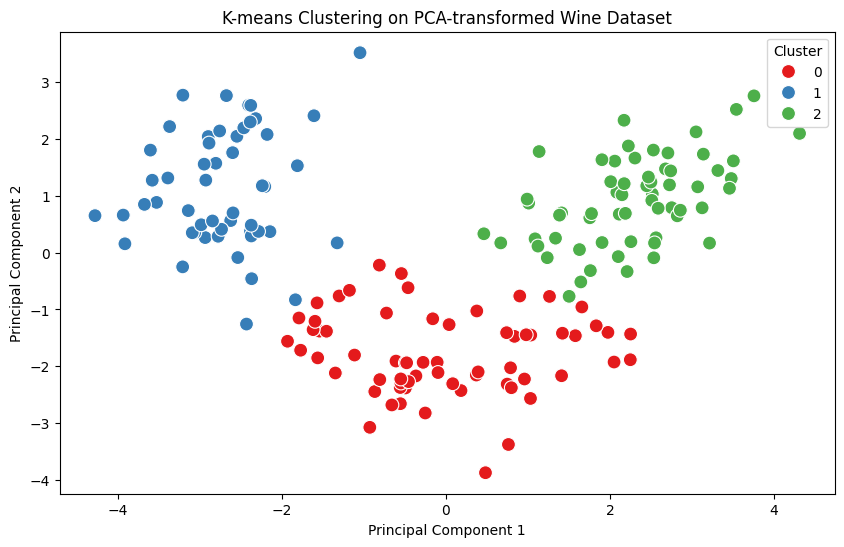

In [67]:
# Visualize the clustering results obtained from PCA-transformed data 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_KMeans', palette='Set1', s=100) 
plt.title('K-means Clustering on PCA-transformed Wine Dataset')
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [68]:
df=wine_data

In [73]:
# Compare the clustering results 
print("PCA-transformed Data Clusters:\n", pca_df['Cluster_KMeans'].value_counts()) 
print()
print("Original Data Clusters:\n", wine_data['Cluster_KMeans'].value_counts()) 
print()
# Evaluate the clustering performance for PCA-transformed data 
silhouette_avg_pca = silhouette_score(X_pca, clusters_pca)

davies_bouldin_avg_pca = davies_bouldin_score(X_pca, clusters_pca) 

print(f'Silhouette Score (PCA-transformed data): {silhouette_avg_pca}') 
print()
print(f'Davies–Bouldin Index (PCA-transformed data): {davies_bouldin_avg_pca}') 
print()
# Evaluate the clustering performance for the original data 
silhouette_avg_original = silhouette_score(X_scaled, clusters)

davies_bouldin_avg_original = davies_bouldin_score(X_scaled, clusters) 

print(f'Silhouette Score (original data): {silhouette_avg_original}') 
print()
print(f'Davies–Bouldin Index (original data): {davies_bouldin_avg_original}')

PCA-transformed Data Clusters:
 Cluster_KMeans
0    65
2    62
1    51
Name: count, dtype: int64

Original Data Clusters:
 Cluster_KMeans
0    65
2    62
1    51
Name: count, dtype: int64

Silhouette Score (PCA-transformed data): 0.2848589191898987

Davies–Bouldin Index (PCA-transformed data): 1.3891879777181648

Silhouette Score (original data): 0.2848589191898987

Davies–Bouldin Index (original data): 1.3891879777181648


the clustering performance is consistent across both the PCA-transformed data and the original data. While the silhouette score and Davies–Bouldin index indicate that the clusters are moderately well-defined,

Dimensionality reduction using PCA helps to simplify the dataset by reducing the number of features, making it easier to visualize and interpret clusters.

PCA can help to remove noise and irrelevant features, potentially improving clustering performance.

Key Findings and Insights

Clustering Consistency: The clustering results were consistent between the original dataset and the PCA-transformed dataset. Both approaches resulted in the same cluster sizes and performance metrics (Silhouette Score and Davies–Bouldin Index).

Clustering Performance: Both the original and PCA-transformed datasets had a Silhouette Score of ~0.285 and a Davies–Bouldin Index of ~1.389, indicating moderately well-defined clusters with reasonable distinctness.

Dimensionality Reduction: PCA effectively reduced the dataset to a lower dimensional space, making it easier to visualize and interpret the clusters without significantly impacting clustering performance.

Practical Implications of Using PCA and Clustering in Data Analysis

Dimensionality Reduction: PCA simplifies high-dimensional data by reducing it to a smaller set of principal components that retain most of the variance in the dataset. This helps in visualizing and understanding complex datasets.

Noise Reduction: By focusing on the principal components, PCA can help remove noise and irrelevant features from the dataset, potentially improving clustering performance.

Improved Visualization: PCA allows for the visualization of high-dimensional data in a 2D or 3D space, making it easier to understand the structure and distribution of data points.

Recommendations for When to Use Each Technique

When to Use PCA:

High-Dimensional Data: When dealing with datasets with a large number of features, PCA can help reduce dimensionality, making the data easier to analyze and visualize.

Noise Reduction: If the dataset contains noise or irrelevant features, PCA can help focus on the most important features, potentially improving clustering performance.

Visualization: When visualizing the data is crucial, PCA can reduce the dimensionality to 2 or 3 principal components, making it easier to plot and interpret the data.

When to Cluster Directly on the Original Dataset:

Interpretability: If maintaining the interpretability of the original features is important, clustering directly on the original dataset is preferable.

Low-Dimensional Data: When the dataset has a manageable number of features, clustering directly on the original data can be effective without the need for dimensionality reduction.

Noisy Data: If the dataset is already clean and free of noise, clustering directly on the original data can yield accurate results without the need for PCA.